In [0]:
import pandas as pd
import numpy as np
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
ps.set_option('compute.ops_on_diff_frames', True)
import matplotlib.pyplot as plt
import plotly.express as px

In [0]:
spark = SparkSession.builder.appName("Databricks Shell").getOrCreate()

spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.1 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
df = spark.read.csv("/FileStore/tables/Supply Chain dataset/DataCoSupplyChainDataset.csv",header= True,inferSchema = True)

sc_df = df.pandas_api()

type(sc_df)

Out[3]: pyspark.pandas.frame.DataFrame

In [0]:
# Displaying Supply-chain dataset

sc_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajast�n,PENDING,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajast�n,CLOSED,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,None,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [0]:
# Supply-chain dataframe columns

sc_df.columns

Out[5]: Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Pr

In [0]:
# replacing space in-between column name with '_'  

sc_df.columns = sc_df.columns.str.replace(' ', '_')

In [0]:
# Supply-chain dataframe info

sc_df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int32  
 2   Days_for_shipment_(scheduled)  180519 non-null  int32  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int32  
 7   Category_Id                    180519 non-null  int32  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname             

In [0]:
# feilds with null in Supply-chain dataframe

sc_df[sc_df.isnull().any().to_numpy()].info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 180519 entries, 0 to 180518
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Customer_Lname       180511 non-null  object
 1   Customer_Zipcode     180516 non-null  int32 
 2   Order_Zipcode        24840 non-null   int32 
 3   Product_Description  0 non-null       object
dtypes: int32(2), object(2)

# DATA CLEANING

In [0]:
# we can check if the Customer Lname is already present in table using customer id

customerID_Null_Lname  = sc_df.loc[sc_df["Customer_Lname"].isnull(),"Customer_Id"].to_numpy()

sc_df.loc[sc_df["Customer_Id"].isin(customerID_Null_Lname),["Customer_Id","Customer_Fname","Customer_Lname"]]

# the we can see none of the customer is repitative we can't infer the last name by any other means but since its just the identity variable and we have Customer ID without any null values we can leave the null values as it is since dropping the rows will decrease the data size 

,Customer_Id,Customer_Fname,Customer_Lname
41422,17937,May,None
50447,14909,Contreras,None
86260,18347,Ray,None
92621,17354,BlueOneal,None
97530,14446,York,None
120404,14870,Farley,None
166129,17929,Le,None
167119,20439,Huff,None


"Customer Zipcode" , "Order_Zipcode" , "Product_Description"  columns can be dropped 

since 
customer zip code column has customer city 
order zip code column has order city
and product description has 0 non-null values and it is just the description of ordered product and it is not needed for supply-chain analysis

In [0]:
sc_df = sc_df.drop(["Customer_Lname","Customer Zipcode" , "Order_Zipcode" , "Product_Description"],axis = 1)

# Data Visualization

Let us explore the data by data visualization

In [0]:
# Late delivery order Late_delivery_risk = 1 is 

ldo = sc_df.groupby("Delivery_Status")['Order_Id'].count()

ldo.sort_values(ascending = False, inplace = True)

ldo.plot.bar(x = 'Delivery_Status', y ='Order_Id')

In [0]:
# we can use late_delivery_risk (Categorical variable that indicates if sending is late (1), it is not late (0)) column to filter all the late deliveries since it indicates all late deliveries

ldp_df = sc_df[sc_df["Late_delivery_risk"] == 1 ].groupby("Product_Name")['Order_Id'].count().reset_index(name='Order_count')

ldp_df.sort_values(by = ['Order_count'],ascending=False, inplace=True)

# through grah we can infer that the first 9 product has the great impact on late delivery

ldp_df.plot.bar(x = 'Product_Name', y ='Order_count')

In [0]:
# the 1st 9 product which has big impact on late deliveries are listed below

ldp_df['Latedel_prod_rank'] = ldp_df['Order_count'].rank(method = 'first', ascending= False)

ldp_df[ldp_df['Latedel_prod_rank']<= 9]

,Product_Name,Order_count,Latedel_prod_rank
0,Field & Stream Sportsman 16 Gun Fire Safe,9516,5.0
19,Nike Men's Dri-FIT Victory Golf Polo,11476,3.0
20,Perfect Fitness Perfect Rip Deck,13473,1.0
29,Diamondback Women's Serene Classic Comfort Bi,7487,7.0
41,Nike Men's Free 5.0+ Running Shoe,6629,8.0
44,Nike Men's CJ Elite 2 TD Football Cleat,12121,2.0
79,Under Armour Girls' Toddler Spine Surge Runni,5865,9.0
111,Pelican Sunstream 100 Kayak,8492,6.0
117,O'Brien Men's Neoprene Life Vest,10565,4.0


In [0]:
# Countries from where purcahse is made and no.of late delivered orders 

cld = sc_df.groupby(["Customer_Country","Late_delivery_risk"])['Order_Id'].count().reset_index(name='Order_count')

cld

,Customer_Country,Late_delivery_risk,Order_count
0,EE. UU.,1,60986
1,Puerto Rico,0,31382
2,EE. UU.,0,50160
3,Puerto Rico,1,37991


In [0]:
sc_df.groupby(["Customer_Country","Late_delivery_risk"])['Order_Id'].count().unstack().plot(kind='bar')

since the late delivery for the given order is higher lets start predict late delivery risk indicator and no.of days for delivery of a product using the the "Days for shipping (real)" (Actual shipping days of the purchased product) so that the delivery performace can go up

In [0]:
sc_df.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 180519 entries, 0 to 180518
Data columns (total 50 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days_for_shipping_(real)       180519 non-null  int32  
 2   Days_for_shipment_(scheduled)  180519 non-null  int32  
 3   Benefit_per_order              180519 non-null  float64
 4   Sales_per_customer             180519 non-null  float64
 5   Delivery_Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int32  
 7   Category_Id                    180519 non-null  int32  
 8   Category_Name                  180519 non-null  object 
 9   Customer_City                  180519 non-null  object 
 10  Customer_Country               180519 non-null  object 
 11  Customer_Email                 180519 non-null  object 
 12  Customer_Fname             

#Predictive analysis

In [0]:
cat_cols = ['Type','Customer_City','Customer_Country','Customer_Segment','Customer_State','Department_Id','Market','Order_City','Order_Country','Order_Region','Order_State','Shipping_Mode','Product_Category_Id','Product_Card_Id','Order_Status']



int_cols = ['Days_for_shipment_(scheduled)','Benefit_per_order','Sales_per_customer','Latitude','Longitude','Order_Item_Discount','Order_Item_Discount_Rate','Order_Item_Product_Price','Order_Item_Profit_Ratio','Order_Item_Quantity','Sales','Order_Item_Total','Order_Profit_Per_Order','Product_Price']

target_col = ['Late_delivery_risk']

cols = cat_cols+int_cols+target_col

sc_pdf = sc_df.loc[:,cols].to_spark()

In [0]:
sc_pdf.schema

Out[18]: StructType([StructField('Type', StringType(), True), StructField('Customer_City', StringType(), True), StructField('Customer_Country', StringType(), True), StructField('Customer_Segment', StringType(), True), StructField('Customer_State', StringType(), True), StructField('Department_Id', IntegerType(), True), StructField('Market', StringType(), True), StructField('Order_City', StringType(), True), StructField('Order_Country', StringType(), True), StructField('Order_Region', StringType(), True), StructField('Order_State', StringType(), True), StructField('Shipping_Mode', StringType(), True), StructField('Product_Category_Id', IntegerType(), True), StructField('Product_Card_Id', IntegerType(), True), StructField('Order_Status', StringType(), True), StructField('Days_for_shipment_(scheduled)', IntegerType(), True), StructField('Benefit_per_order', DoubleType(), True), StructField('Sales_per_customer', DoubleType(), True), StructField('Latitude', DoubleType(), True), StructField('

In [0]:
#Changing Cat_cols to Binary vectors using One-Hot Encoding and Vector assembler

from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler



indexers = [
    StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c))
    for c in cat_cols
]

encoders = [
    OneHotEncoder(
        inputCol=indexer.getOutputCol(),
        outputCol="{0}_encoded".format(indexer.getOutputCol())) 
    for indexer in indexers
]

assembler = VectorAssembler(
    inputCols=[encoder.getOutputCol() for encoder in encoders],
    outputCol="cat_Vec_features"
)


pipeline = Pipeline(stages=indexers + encoders + [assembler])
sc_pdf = pipeline.fit(sc_pdf).transform(sc_pdf)

In [0]:
#Changing numerical column to vector using Vector assembler

assembler = VectorAssembler(
    inputCols= int_cols ,
    outputCol="num_Vec_features")

sc_pdf = assembler.transform(sc_pdf)

In [0]:
# Standardizing Numerical vector features using standard scalar method

from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(
    inputCol= "num_Vec_features" ,
    outputCol="sc_num_Vec_features" , withMean= True, withStd= True)

sc_model = scaler.fit(sc_pdf)
sc_pdf = sc_model.transform(sc_pdf)

In [0]:
#Concat numerical vector features and categorical vector features
assembler = VectorAssembler(
    inputCols= ["cat_Vec_features","sc_num_Vec_features"] ,
    outputCol="features")

sc_pdf = assembler.transform(sc_pdf)

In [0]:
# getting features and target column in new dataframe

fet_df = sc_pdf['features','Late_delivery_risk']

#,'Days_for_shipping_(real)'

In [0]:
# Computing the components and its varience 

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA

K =100

pca = PCA(k=K, inputCol="features", outputCol="PCA") # here I Have defined maximum number of features that I have
pcaModel = pca.fit(fet_df) # fit the data to pca to make the model
print(pcaModel.explainedVariance) # here it will explain the variances
cumValues = pcaModel.explainedVariance.cumsum() # get the cumulative values


[0.19910513781272843,0.10713889794870197,0.0856164414491151,0.06294122369696742,0.058433631410254705,0.05075818483165203,0.022808427880684254,0.02233151411285377,0.019673883527541156,0.017828861928146162,0.016309730141622784,0.0152886662239809,0.014750910015662455,0.014618718297511718,0.012582306853010412,0.010107515847306238,0.008676507240976147,0.008619664194461439,0.007433610636803887,0.006446160965729213,0.006287265830621691,0.006042620129959345,0.005985310539982383,0.005969813576150077,0.005817195166310147,0.004973654349845736,0.004577410146201176,0.00392365202069928,0.003835386068752807,0.003787055308750939,0.0035692732742169226,0.0033972028082987753,0.0032408951625091447,0.003127996841774154,0.0029085291399387316,0.0028855272179639005,0.0028454849066451705,0.0027282524705580877,0.002666163309898096,0.0025146297480827143,0.0022467720289584383,0.002198595896699778,0.002125024765113347,0.001946699089192769,0.0019021821948555296,0.001863361527038333,0.0017699486013723527,0.001626894

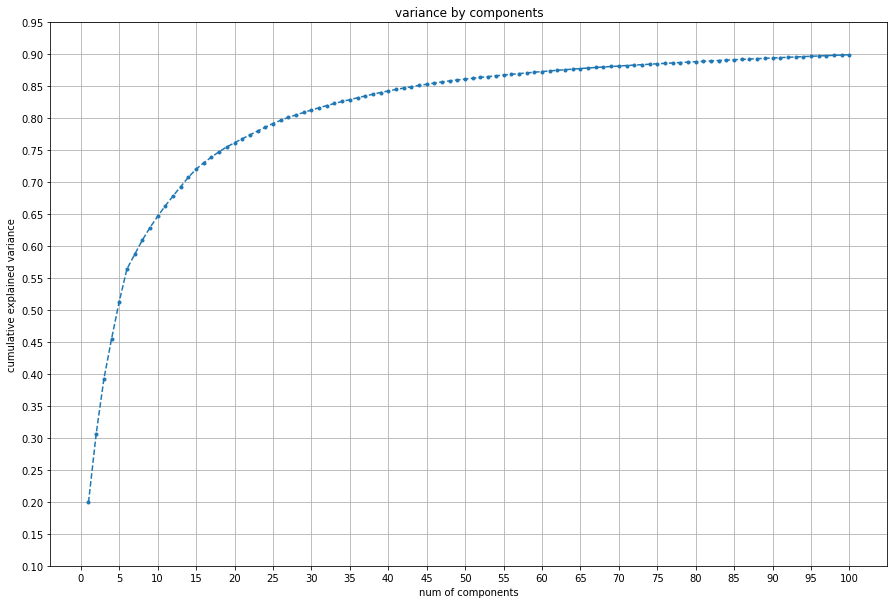

In [0]:
 # ploting the varience by k

plt.figure(figsize=(15,10))
plt.plot(range(1,K+1), cumValues, marker = '.', linestyle='--')
plt.xticks(np.arange(0, K+1, 5))
plt.yticks(np.arange(0.1, 1, 0.05))
plt.title('variance by components')
plt.xlabel('num of components')
plt.ylabel('cumulative explained variance')
plt.grid()

In [0]:
# calculating the varience difference between k and K+1 

k = []
K = 100
for i in range(K):
    k.append(i+1)

var_diff = [0]
for i in range(len(cumValues)):
    if i < len(cumValues)-1:
        var_diff.append(cumValues[i+1] - cumValues[i])
    
var_df = pd.DataFrame({'column_nos': np.array(k),
                      'Varience': np.array(cumValues),
                      'Var_diff' : np.array(var_diff)})

var_df.drop(0, inplace= True)

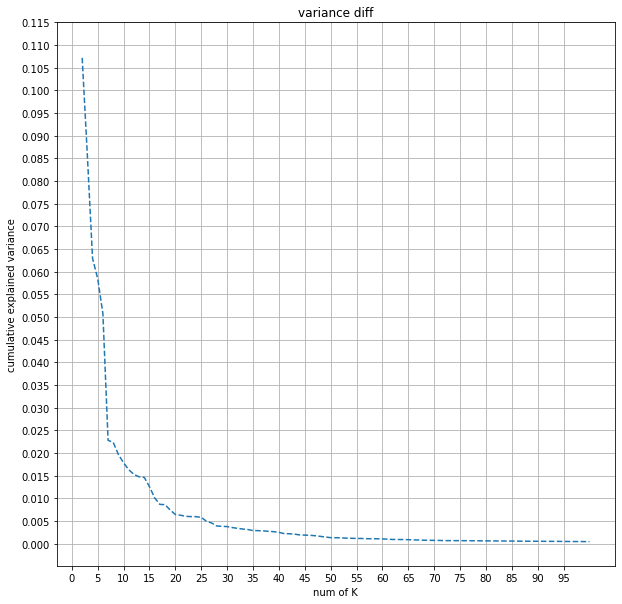

In [0]:
plt.figure(figsize=(10,10))
plt.plot(var_df['column_nos'],var_df['Var_diff'], linestyle='--')
plt.xticks(np.arange(0, 100, 5))
plt.yticks(np.arange(0.00, .12, 0.005))
plt.title('variance diff')
plt.xlabel('num of K')
plt.ylabel('cumulative explained variance')
plt.grid()

since the varience by component graph shows that 45 components obsereves 85% varience and the varience diff by component graph shows after 45 component the varience gained is saturating we can fix the K value as 45

In [0]:
# reducing the features to 45 components

pca = PCA(k=45, inputCol="features", outputCol="pca_features") # here I Have defined maximum number of features that I have
pcaModel = pca.fit(fet_df)
fet_df = pcaModel.transform(fet_df)

#ml_df = fet_df.drop('features')

In [0]:
from pyspark.ml.classification import RandomForestClassifier


inc_df = fet_df['pca_features','Late_delivery_risk']

# spliting the data to train and test
(train, test) = inc_df.randomSplit([0.8, 0.2])

# fitting the tarin data to randomforest classifier 
rfc = RandomForestClassifier(featuresCol="pca_features", labelCol="Late_delivery_risk")
rfc = rfc.fit(train)

# predicting the test set
pred = rfc.transform(test)
pred.show(3)

+--------------------+------------------+--------------------+--------------------+----------+
|        pca_features|Late_delivery_risk|       rawPrediction|         probability|prediction|
+--------------------+------------------+--------------------+--------------------+----------+
|[-2.9247780331251...|                 1|[1.93349802830946...|[0.09667490141547...|       1.0|
|[-2.9082925148217...|                 0|[11.5341466421515...|[0.57670733210757...|       0.0|
|[-2.8711932288126...|                 1|[11.8165574488801...|[0.59082787244400...|       0.0|
+--------------------+------------------+--------------------+--------------------+----------+
only showing top 3 rows



Confusion Matrix:
[[13449  2960]
 [ 8289 11561]]
accuracy :  68.97597837778207


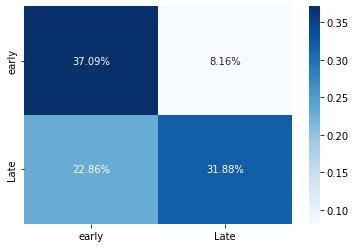

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2839696223241790>:17
     13 import seaborn as sns
     14 sns.heatmap(cm/np.sum(cm), annot=True, xticklabels=['early','Late'],yticklabels=['early','Late'],
     15             fmt='.2%', cmap='Blues')
---> 17 f1_score = f1_score(y_orig, y_pred)
     18 print('f1_score : ',f1_score)

NameError: name 'f1_score' is not defined

In [0]:
from sklearn.metrics import confusion_matrix

y_pred=pred.select("prediction").collect()
y_orig=pred.select("Late_delivery_risk").collect()

cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

accuracy = (cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,0]+cm[0,0]+cm[1,1])*100
print('accuracy : ',accuracy)

import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, xticklabels=['early','Late'],yticklabels=['early','Late'],
            fmt='.2%', cmap='Blues')

f1_score = f1_score(y_orig, y_pred)
print('f1_score : ',f1_score)

# Hyperparameter tunning

In [0]:
import hyperopt
from hyperopt import SparkTrials
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
import mlflow
import hyperopt.pyll
from hyperopt.pyll import scope
mlflow.sklearn.autolog(disable = True)

In [0]:
x_train_bc = spark.sparkContext.broadcast(np.array(train.select("pca_features").collect()).reshape(-1,45))
y_train_bc = spark.sparkContext.broadcast(train.select("Late_delivery_risk").collect())
x_test_bc = spark.sparkContext.broadcast(np.array(test.select("pca_features").collect()).reshape(-1,45))
y_test_bc = spark.sparkContext.broadcast(test.select("Late_delivery_risk").collect())

In [0]:
# search space

space = {
        'max_depth': hp.quniform('max_depth', 5, 25, 5),
        'n_estimators': scope.int(hp.quniform('n_estimators', 500, 1000, 100)),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 5, 25, 5))
}

n_evals = 1

In [0]:
#objective function

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

def objective(hyperparameter):
    x_train = x_train_bc.value
    y_train = y_train_bc.value
    x_test = x_test_bc.value
    y_test = y_test_bc.value

    model = RandomForestClassifier(**hyperparameter)

    model.fit(x_train,y_train)

    pred = model.predict(x_test)
    val_f1_score = f1_score(y_test,pred)

    return{"loss": -val_f1_score, "status": STATUS_OK}

In [0]:
#  Spark trail

trials = SparkTrials(parallelism = 50)

#with mlflow.start_run():
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=n_evals,
    trials=trials)

best_f1 = sorted(trials.results , key = lambda result : result['loss']) [0]["loss"]* -1

In [0]:
# best Hyperparameters
best['F1 score'] = best_f1
display(pd.DataFrame(best,index=[0]))

In [0]:
# fitting tunned hyperparameter in random forest classifier to build a better preditive model

x_train = (np.array(train.select("pca_features").collect()).reshape(-1,45))
y_train = np.array(train.select("Late_delivery_risk").collect())
x_test = (np.array(test.select("pca_features").collect()).reshape(-1,45))
y_test = np.array(test.select("Late_delivery_risk").collect())

mlflow.sklearn.autolog(disable = False)

final_model = RandomForestClassifier(n_estimators = int(best['n_estimators']),min_samples_leaf = int(best['min_samples_leaf']),max_depth= int(best['max_depth']))
final_model.fit(x_train,y_train.ravel())

fm_pred = final_model.predict(x_test)


In [0]:
cm = confusion_matrix(y_test, fm_pred)
print("Confusion Matrix:")
print(cm)
accuracy = (cm[0,0]+cm[1,1])/(cm[0,1]+cm[1,0]+cm[0,0]+cm[1,1])*100
print('accuracy : ',accuracy)

import seaborn as sns
sns.heatmap(cm/np.sum(cm), annot=True, xticklabels=['early','late'],yticklabels=['early','late'],
            fmt='.2%', cmap='Blues')



In [0]:
# analysis based on the hypothesis:The delivery performance is able to be improved with the use of a model that was developed to forecast the late delivery risk indicator. 
# from graph we can infer that the the shipments which are late and predicted early is 20% according from business percepetive if the shipment is incated as getting delived late and if it gets delivered early it doesn't raise a issue , the shipments are indicated as it will get delivered earlier and if it gets delivered late it will raise an issue.

#so let us explore on True Negative values


(sc_df["Late_delivery_risk"].value_counts(normalize= True)*100).plot(kind='bar')
# from the graph below we can infer that the late shipments a 54% 

In [0]:
# let us try to compute a graph with predited variable and see how much the late shipments are decreased with the assumption if the prediction indicator predict a shipment as "late" then the busines fix the problem with shipment and deliver the shipment on-time

L = cm[1,0]
E = cm[0,1]+cm[0,0]+cm[1,1]

T = test.pandas_api()

graph_df = T.groupby(["Late_delivery_risk"], as_index=False)["pca_features"].count()
graph_df.rename(columns = {'pca_features':'count'}, inplace = True)
graph_df['actual/prediction'] =  "actual"



df1 = ps.DataFrame([[1 , L , "prediction"], [0 , E , "prediction"]],
                   columns=["Late_delivery_risk", "count","actual/prediction"])
graph_df = ps.concat([graph_df,df1])
graph_df = graph_df.reset_index(drop = True)

graph_df

In [0]:
# from the graph we can infer that the late prediction indicator have helped to increase the early shipments

graph_df.groupby(["actual/prediction","Late_delivery_risk"])['count'].sum().unstack().plot(kind='bar')